# Hoja 2:

## Ejercicio 3:

In [23]:
import numpy as np
import matplotlib.pyplot as plt

def basin_plot(f, p, a, b, c, d):

    r=400
    n_iter=100
    tol=1e-3
    R_max=1e3
    cmap=None
    
    xs = np.linspace(a, b, r)
    ys = np.linspace(c, d, r)
    XX, YY = np.meshgrid(xs, ys)

    N = r * r
    pts = np.column_stack([XX.ravel(), YY.ravel()])
    conv = np.zeros(N, dtype=bool)
    diver = np.zeros(N, dtype=bool)
    alive = np.ones(N, dtype=bool)

    px, py = p

    for _ in range(n_iter):
        pts[alive] = np.array([f(v) for v in pts[alive]])

        dist = np.linalg.norm(pts[alive] - p, axis=1)
        conv_now = dist < tol
        diver_now = np.linalg.norm(pts[alive], axis=1) > R_max

        idx_alive = np.flatnonzero(alive)
        conv[idx_alive] |= conv_now
        diver[idx_alive] |= diver_now

        still_alive = ~(conv_now | diver_now)
        alive[idx_alive[~still_alive]] = False

        if not alive.any():
            break

    Z = np.zeros(N, dtype=int)
    Z[diver] = 1
    Z[conv] = 2
    Z = Z.reshape(r, r)


    plt.figure(figsize=(6, 6))
    plt.imshow(Z, origin='lower', extent=[a, b, c, d],
            interpolation='nearest', cmap=plt.cm.get_cmap('brg', 3))
    plt.plot(px, py, 'ko')
    plt.axis('equal')
    plt.show()

C:\Users\miria\AppData\Local\Temp\ipykernel_37852\3479427013.py:49: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  interpolation='nearest', cmap=plt.cm.get_cmap('brg', 3))


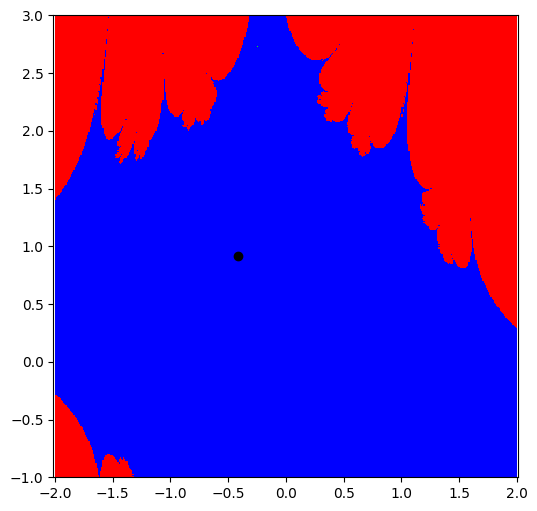

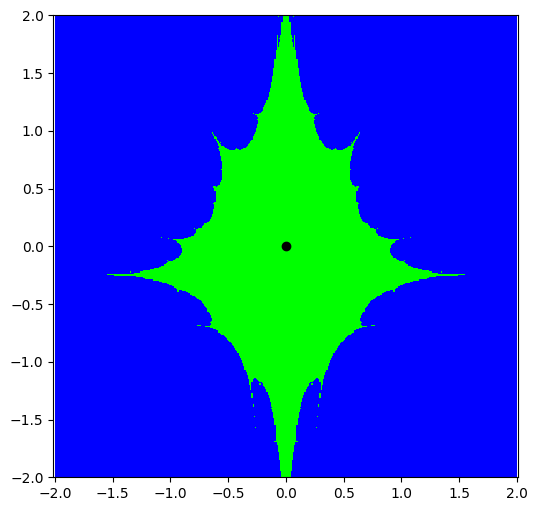

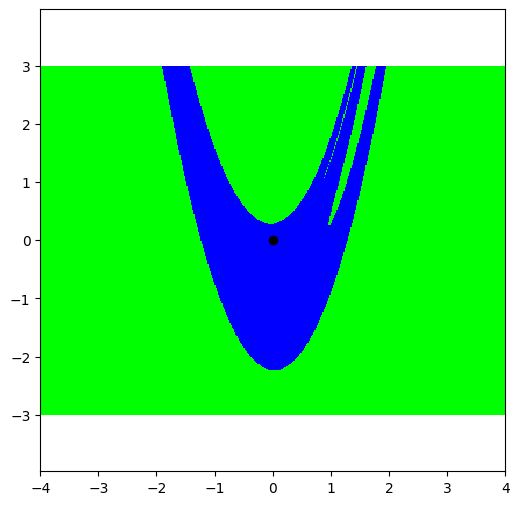

In [24]:
sqrt3 = np.sqrt(3)

def f4(v):
    x,y = v
    factor = 5/12
    return [ factor*(x - sqrt3*y + x**2*y), factor*(sqrt3*x + y + y**2*x) ]

def f5(v):
    x,y = v
    return [ 0.5*x + 2*x*y, -(2/3)*y + x**2 ]

def f6(v):
    x,y = v
    return [ 1 + y - (7/5)*x**2, 0.3*x ]

p4 = (-0.416150, 0.913722)
basin_plot(f4, p4, a=-2, b=2, c=-1, d=3)

p5 = (0.0, 0.0)
basin_plot(f5, p5, a=-2, b=2, c=-2, d=2)

p6 = (0.0, 0.0)
basin_plot(f6, p6, a=-4, b=4, c=-3, d=3)


## Ejercicio 4:

In [25]:
def f(v):
    x, y = v
    return [x*x - y*y - 0.15, 2*x*y + 0.75]

def orb(v0):
    n = 200
    v = np.array(v0, dtype=float)
    track = [v.copy()]
    for _ in range(n):
        v = np.array(f(v))
        track.append(v.copy())
    return np.array(track)


traj = orb([0, 0], 20)
for k, p in enumerate(traj[:10], 1):
    print(f"{k:2d}  {p}")
    

def detect_period(traj, tol=1e-6, p_max=10):
    for p in range(1, p_max+1):
        if np.linalg.norm(traj[-1]-traj[-1-p]) < tol \
           and np.linalg.norm(traj[-2]-traj[-2-p]) < tol \
           and np.linalg.norm(traj[-3]-traj[-3-p]) < tol:
            return p
    return None

period = detect_period(orb([0,0], 50))
print("Periodo detectado:", period)


TypeError: orb() takes 1 positional argument but 2 were given